In [ ]:
%autosave 500

# Cerebellar MLI network
## Given triadic motifs distribution
## Read-out activity
    
This notebook sets up the network of MLIs, runs it and collects data on the activity.  Plots of the ISIs, spike autocorrelograms, etc are plotted.

In [2]:
from __future__ import print_function
import datetime
import os
from os import chdir
from brian import *

import sys
sys.path.append('/Users/maximebeau/Desktop/Science/4_Stage_UCL_WIBR_HAUSSER/My_project/model_PKJ_MLI - Lennon et al., computneur2014')
from MLI_PKJ_net import *
sys.path.append('/Users/maximebeau/Desktop/Science/4_Stage_UCL_WIBR_HAUSSER/My_project')
from MLI_net_personal import *
sys.path.append('/Users/maximebeau/Desktop/Science/4_Stage_UCL_WIBR_HAUSSER/My_project/MLI_net_personal')
from molecular_layer_geometric import *
from sampling_samplingAnalysis import *
from sampling_samplingAnalysis import Nsample_sampling__Ntriads_patchings__triadsAnalysis

import cPickle
import time
set_global_preferences(useweave=True, usenewpropagate=True, usecodegen=True, usecodegenweave=True)
defaultclock.dt = .25*ms
from statsmodels.tsa.stattools import acf
from pandas import *

/Users/maximebeau/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Create the network : instanciations from Geometric_MLI, whose subgroups are stored in a table

In [3]:
load_saved_synapses = False
save_results = False

T = 300*second
# N_MLI = 160
# N_PKJ = 16
# MLI = MLIGroup(N_MLI)
# PKJ = PurkinjeCellGroup(N_PKJ)

N_MLI_geometric_OX=16 # MLItable "columns" : len(MLItable[0])
N_MLI_geometric_OY=10 # MLItable "raws" : len(MLItable)
N_MLI = N_MLI_geometric_OX*N_MLI_geometric_OY
MLI = Geometric_MLI(N_MLI)
MLItable, MLI = create_MLItable(MLI, N_MLI_geometric_OX, N_MLI_geometric_OY)

brian.stateupdater: WARNING  Using codegen CStateUpdater


[[(oneMLI, 0), (oneMLI, 1), (oneMLI, 2), (oneMLI, 3), (oneMLI, 4), (oneMLI, 5), (oneMLI, 6), (oneMLI, 7), (oneMLI, 8), (oneMLI, 9), (oneMLI, 10), (oneMLI, 11), (oneMLI, 12), (oneMLI, 13), (oneMLI, 14), (oneMLI, 15)], [(oneMLI, 16), (oneMLI, 17), (oneMLI, 18), (oneMLI, 19), (oneMLI, 20), (oneMLI, 21), (oneMLI, 22), (oneMLI, 23), (oneMLI, 24), (oneMLI, 25), (oneMLI, 26), (oneMLI, 27), (oneMLI, 28), (oneMLI, 29), (oneMLI, 30), (oneMLI, 31)], [(oneMLI, 32), (oneMLI, 33), (oneMLI, 34), (oneMLI, 35), (oneMLI, 36), (oneMLI, 37), (oneMLI, 38), (oneMLI, 39), (oneMLI, 40), (oneMLI, 41), (oneMLI, 42), (oneMLI, 43), (oneMLI, 44), (oneMLI, 45), (oneMLI, 46), (oneMLI, 47)], [(oneMLI, 48), (oneMLI, 49), (oneMLI, 50), (oneMLI, 51), (oneMLI, 52), (oneMLI, 53), (oneMLI, 54), (oneMLI, 55), (oneMLI, 56), (oneMLI, 57), (oneMLI, 58), (oneMLI, 59), (oneMLI, 60), (oneMLI, 61), (oneMLI, 62), (oneMLI, 63)], [(oneMLI, 64), (oneMLI, 65), (oneMLI, 66), (oneMLI, 67), (oneMLI, 68), (oneMLI, 69), (oneMLI, 70), (oneML

Get the subgroup index !!! THEN modify the sampling/patching algorithms with the new ways of accessing the index
for i in range(len(MLI)):
    print('table', MLItable[0][0].??)
    print('MLI', MLI[i].??)
    if MLItable[0][0].??==MLI[i].??:
        print(i)
    else:
        print('no match')
SOLUTION : use a tuple (MLIsubgroup of 1, index of this subgroup) to fill the MLItable !

## Connect the network : home made connect_mli_mli_personal() function

In [4]:
# synaptic weights
# w_mli_pkj = 1.25
w_mli_mli = 1.
# w_pkj_mli = 1.

# Synapses
# S_MLI_PKJ = Synapses(MLI,PKJ,model='w:1',pre='g_inh+=PKJ.g_inh_*w')
S_MLI_MLI = Synapses(MLI,MLI,model='w:1',pre='g_inh+=MLI.g_inh_*w')
# S_PKJ_MLI = Synapses(PKJ,MLI,model='w:1',pre='g_inh+=MLI.g_inh_*w')

# Connections
if load_saved_synapses:
    syn_dir = './'
    # S_MLI_PKJ = load_synapses(S_MLI_PKJ, 'S_MLI_PKJ', syn_dir)
    S_MLI_MLI = load_synapses(S_MLI_MLI, 'S_MLI_MLI', syn_dir)
    # S_PKJ_MLI = load_synapses(S_PKJ_MLI, 'S_PKJ_MLI', syn_dir)
else:
    # connect_mli_pkj(S_MLI_PKJ,pkj_dist=8,syn_prob=.25)
    # connect_mli_mli(S_MLI_MLI,dist=80,syn_prob=.05)
    connect_mli_mli_personal(MLItable, S_MLI_MLI, syn_prob=0.19) # according to experimental prob : 0.2
    # S_PKJ_MLI[:,:] = '((j/(N_MLI/N_PKJ)-i)%N_PKJ <= 2) & ((j/(N_MLI/N_PKJ)-i)%N_PKJ > 0) & (j%(N_MLI/N_PKJ)<3) & (rand()<.5)'
    # S_MLI_PKJ.w[:,:] = 'rand()*w_mli_pkj'
    S_MLI_MLI.w[:,:] = 'rand()*w_mli_mli'
    # S_PKJ_MLI.w[:,:] = 'rand()*w_pkj_mli'


print('Convergences')
# print 'MLI->PKJ convergence: ', len(S_MLI_PKJ)/float(N_PKJ)
print ('MLI->MLI convergence: ', len(S_MLI_MLI)/float(N_MLI))
# print 'PKJ->MLI-BS convergence: ', len(S_PKJ_MLI)/(float(N_MLI))
print ('\nDivergences')
# print 'MLI->PKJ divergence: ', len(S_MLI_PKJ)/float(N_MLI)
print ('MLI->MLI divergence: ', len(S_MLI_MLI)/float(N_MLI))
# print 'PKJ->MLI-BS divergence: ', len(S_PKJ_MLI)/float(N_PKJ)

Convergences
MLI->MLI convergence:  28.71875

Divergences
MLI->MLI divergence:  28.71875


## Readout the connectivity of the genuine Network

>The synapses table

In [5]:
chdir('/Users/maximebeau/Desktop/Science/4_Stage_UCL_WIBR_HAUSSER/My_project/experiments_results/personnalCon_noPKJ/connectivity')
from MLI_connectivity_TableReadout import *
write_synapses_table(S_MLI_MLI, 'personalCon_noPKJ.txt')
print(len(S_MLI_MLI), " synapses in S_MLI_MLI.")

4595  synapses in S_MLI_MLI.


>The motifs distribution

Triads analysis :  {'201': 0.0011273957158962795, '021C': 0.08229988726042842, '021D': 0.0496054114994363, '210': 0.0011273957158962795, '120U': 0.002254791431792559, '030C': 0.0033821871476888386, '003': 0.27282976324689967, '300': 0.0, '012': 0.4137542277339346, '021U': 0.05186020293122886, '102': 0.04509582863585118, '120D': 0.0011273957158962795, '030T': 0.02142051860202931, '111U': 0.02480270574971815, '120C': 0.005636978579481398, '111D': 0.02367531003382187}
Aimed analysis :  {'201': 0.0, '021C': 0.046242774566473986, '021D': 0.10404624277456648, '210': 0.0, '120U': 0.017341040462427744, '030C': 0.0, '003': 0.37572254335260113, '300': 0.0, '012': 0.2658959537572254, '021U': 0.057803468208092484, '120D': 0.0, '102': 0.023121387283236993, '111U': 0.028901734104046242, '030T': 0.07514450867052024, '120C': 0.005780346820809248, '111D': 0.0}

 >> Difference between two :  0.0295411890441
Connection Probability : 0.189590379557
Number of synapses inS_MLI_MLI : 4595


,Aimed dist. -- 0.0295411890441,Network dist.
201,0.000000,0.112740
021C,4.624277,8.229989
021D,10.404624,4.960541
210,0.000000,0.112740
120U,1.734104,0.225479
030C,0.000000,0.338219
003,37.572254,27.282976
300,0.000000,0.000000
012,26.589595,41.375423
021U,5.780347,5.186020


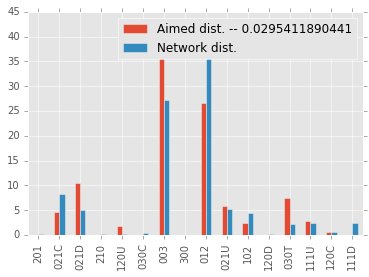

In [7]:
%matplotlib inline
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

Analysis_confirmation=Nsample_sampling__Ntriads_patchings__triadsAnalysis(Nsample=1000, Ntriads=1, SynapseObj=S_MLI_MLI, MLItable=MLItable, strategy='rdm', coordUnit='um', Ysizeum=100, Xsizeum=100)
print ("Triads analysis : ", Analysis_confirmation[5])
print ("Aimed analysis : ", Analysis_confirmation[4])
print ("\n >> Difference between two : ", Analysis_confirmation[3])
print ("Connection Probability :", Analysis_confirmation[2])
print ("Number of synapses inS_MLI_MLI :", len(S_MLI_MLI))

patList = []
patValList = []
for pat in Analysis_confirmation[0]:
    patList.append(pat)
    patValList.append((Analysis_confirmation[4][pat]*100, Analysis_confirmation[5][pat]*100))

patDataFrame = pandas.DataFrame(data = patValList, index = patList, columns = ['Aimed dist. -- '+str(Analysis_confirmation[3]), 'Network dist.'])

ax = patDataFrame.plot.bar()  # s is an instance of Series
fig = ax.get_figure()
fig.savefig('/Users/maximebeau/Desktop/Science/4_Stage_UCL_WIBR_HAUSSER/My_project/experiments_results/personnalCon_noPKJ/figures/motifs distributions/wholeNet_preCorrection.pdf')

patDataFrame

## Modify the Network's connectivity
#### Reproduce Sarah's experimental conditions:
1) Sample N little piece of "artificial tissue" : reproduces the microscope optic window
2) Choose, each times, 3 random neurons and use NetworkX to make a graph of them : reproduces triads "patching"
3) Then analyze the population of those 3 noded graphs with triadic_census from NetworkX

Use this in order to modify the 160 MLIs network triadic patterns of con 

>Correct the distribution of one sample (Nsample * Ntriads triads) of the network

In [7]:
correctorOutput = triadsPatterns_distribution_corrector(Nsample=200, Ntriads=1, SynapseObj=S_MLI_MLI, MLItable=MLItable,
                                             TRY=10, prev_aim_diff=0.001,
                                             strategy='rdm', coordUnit='um', Ysizeum=100, Xsizeum=100,
                                             Dis003=65.0 / 173, Dis012=46.0 / 173, Dis021C=8.0 / 173,
                                             Dis021D=18.0 / 173,
                                             Dis021U=10.0 / 173, Dis030C=0.0 / 173, Dis030T=13.0 / 173,
                                             Dis102=4.0 / 173,
                                             Dis111D=0.0 / 173, Dis111U=5.0 / 173, Dis120C=1.0 / 173, Dis120D=0.0 / 173,
                                             Dis120U=3.0 / 173, Dis201=0.0 / 173, Dis210=0.0 / 173, Dis300=0.0 / 173)
#low prev_aim_diff : plus il est faible, plus les listes incPat/decPat resteront pleines facilement, ce qui assure que le programme continuera de tourner plus longtemps.
S_MLI_MLI = correctorOutput[0]
endDistribution = correctorOutput[1]
aimedDistribution = correctorOutput[2]

patList = []
patValList = []
for pat in endDistribution:
    patList.append(pat)
    patValList.append((aimedDistribution[pat]*100, endDistribution[pat]*100))

patDataFrame = pandas.DataFrame(data = patValList, index = patList, columns = ['Aimed dist. -- '+str(correctorOutput[3]), 'Sample dist.'])

ax = patDataFrame.plot.bar()  # s is an instance of Series
fig = ax.get_figure()
fig.savefig('/Users/maximebeau/Desktop/Science/4_Stage_UCL_WIBR_HAUSSER/My_project/experiments_results/personnalCon_noPKJ/figures/motifs distributions/sampledNet_forCorrection.pdf')

patDataFrame

Number of triads in the sample :  194





New memory graphs screen, Try number :  0
The actual pattern distribution is :
{'201': 0.005154639175257732, '021C': 0.08247422680412371, '021D': 0.041237113402061855, '210': 0.0, '120U': 0.005154639175257732, '030C': 0.005154639175257732, '003': 0.32989690721649484, '300': 0.0, '012': 0.4020618556701031, '021U': 0.030927835051546393, '102': 0.03608247422680412, '120D': 0.0, '030T': 0.015463917525773196, '111U': 0.030927835051546393, '120C': 0.0, '111D': 0.015463917525773196}
The aimed experimental pattern distribution is :
{'201': 0.0, '021C': 0.046242774566473986, '021D': 0.10404624277456648, '210': 0.0, '120U': 0.017341040462427744, '030C': 0.0, '003': 0.37572254335260113, '300': 0.0, '012': 0.2658959537572254, '021U': 0.057803468208092484, '120D': 0.0, '102': 0.023121387283236993, '111U': 0.028901734104046242, '030T': 0.07514450867052024, '120C': 0.005780346820809248, '111D': 0.0}
Patterns to decrease :  ['201', '021C', '030C', '012', '102

ValueError: I/O operation on closed file

## Readout the connectivity of the modified Network

>The synapses table

In [ ]:
# Connectivity readout
from os import chdir
chdir('/Users/maximebeau/Desktop/Science/4_Stage_UCL_WIBR_HAUSSER/My_project/experiments_results/personnalCon_noPKJ/connectivity')
from MLI_connectivity_TableReadout import *
write_synapses_table(S_MLI_MLI, 'personalCon_noPKJ_patternDisCorrected.txt')

>The motifs distribution

Triads analysis :  {'201': 0.0011337868480725624, '021C': 0.09523809523809523, '021D': 0.046485260770975055, '210': 0.0011337868480725624, '120U': 0.003401360544217687, '030C': 0.003401360544217687, '003': 0.26303854875283444, '300': 0.0, '012': 0.4489795918367347, '021U': 0.04081632653061224, '102': 0.02947845804988662, '120D': 0.0045351473922902496, '030T': 0.032879818594104306, '111U': 0.015873015873015872, '120C': 0.003401360544217687, '111D': 0.01020408163265306}
Aimed analysis :  {'201': 0.0, '021C': 0.046242774566473986, '021D': 0.10404624277456648, '210': 0.0, '120U': 0.017341040462427744, '030C': 0.0, '003': 0.37572254335260113, '300': 0.0, '012': 0.2658959537572254, '021U': 0.057803468208092484, '120D': 0.0, '102': 0.023121387283236993, '111U': 0.028901734104046242, '030T': 0.07514450867052024, '120C': 0.005780346820809248, '111D': 0.0}

 >> Difference between two :  0.0323555240979
Connection Probability : 0.185941043084
Number of synapses inS_MLI_MLI : 4917


,Aimed dist.,Network dist.
201,0.000000,0.113379
021C,4.624277,9.523810
021D,10.404624,4.648526
210,0.000000,0.113379
120U,1.734104,0.340136
030C,0.000000,0.340136
003,37.572254,26.303855
300,0.000000,0.000000
012,26.589595,44.897959
021U,5.780347,4.081633


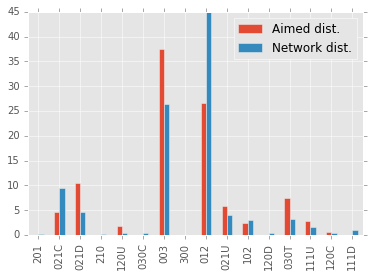

In [9]:
Analysis_confirmation=Nsample_sampling__Ntriads_patchings__triadsAnalysis(Nsample=1000, Ntriads=1, SynapseObj=S_MLI_MLI, MLItable=MLItable, strategy='rdm', coordUnit='um', Ysizeum=100, Xsizeum=100)
print ("Triads analysis : ", Analysis_confirmation[5])
print ("Aimed analysis : ", Analysis_confirmation[4])
print ("\n >> Difference between two : ", Analysis_confirmation[3])
print ("Connection Probability :", Analysis_confirmation[2])
print ("Number of synapses inS_MLI_MLI :", len(S_MLI_MLI))

patList = []
patValList = []
for pat in Analysis_confirmation[0]:
    patList.append(pat)
    patValList.append((Analysis_confirmation[4][pat]*100, Analysis_confirmation[5][pat]*100))

patDataFrame = pandas.DataFrame(data = patValList, index = patList, columns = ['Aimed dist. -- '+str(Analysis_confirmation[3], 'Network dist.'])

ax = patDataFrame.plot.bar()  # s is an instance of Series
fig = ax.get_figure()
fig.savefig('/Users/maximebeau/Desktop/Science/4_Stage_UCL_WIBR_HAUSSER/My_project/experiments_results/personnalCon_noPKJ/figures/motifs distributions/wholeNet_postCorrection2.pdf')

patDataFrame

## Run the network

In [5]:
@network_operation(Clock(dt=defaultclock.dt))
def random_current():
    MLI.I = gamma(3.966333,0.006653,size=len(MLI)) * nA
    # PKJ.I = gamma(0.430303,0.195962,size=len(PKJ)) * nA

In [6]:
# Monitor
MS_MLI = SpikeMonitor(MLI)
MR_MLI = PopulationRateMonitor(MLI,bin=1*ms)
MISI_MLI = ISIHistogramMonitor(MLI,bins=arange(0,162,2)*ms)
MV_MLI = StateMonitor(MLI, 'V', record=range(N_MLI))

# MS_PKJ = SpikeMonitor(PKJ)
# MR_PKJ = PopulationRateMonitor(PKJ,bin=1*ms)
# MISI_PKJ = ISIHistogramMonitor(PKJ,bins=arange(0,162,2)*ms)
# MV_PKJ = StateMonitor(PKJ, 'V', record=range(N_PKJ))

start = time.time()
run(T)
print time.time() - start

170.610763073


In [7]:
if save_results: 
    # save monitors for reproducibility
    monitors = {'MS_MLI':MS_MLI, 'MR_MLI':MR_MLI, 'MISI_MLI':MISI_MLI, 'MV_MLI':MV_MLI, 'MS_PKJ':MS_PKJ, 'MR_PKJ':MR_PKJ, 'MISI_PKJ':MISI_PKJ, 'MV_PKJ':MV_PKJ}
    out_dir = './'
    for name, mon in monitors.iteritems():
        cPickle.dump(mon, open(out_dir+'%s.pkl'%name,'w'))
        
    # save connections for reproducibility
    syn_dir = './'
    # save_synapses(S_MLI_PKJ, 'S_MLI_PKJ', syn_dir)
    save_synapses(S_MLI_MLI, 'S_MLI_MLI', syn_dir)
    # save_synapses(S_PKJ_MLI, 'S_PKJ_MLI', syn_dir)

## Plot the Network's run output

In [8]:
chdir('/Users/maximebeau/Desktop/Science/4_Stage_UCL_WIBR_HAUSSER/My_project/experiments_results/personnalCon_noPKJ/figures')

In [9]:
load_monitors = False
if load_monitors:
    in_dir = './'
    MS_MLI = cPickle.load(open(in_dir+'MS_MLI.pkl'))
    MV_MLI = cPickle.load(open(in_dir+'MV_MLI.pkl'))
    # MS_PKJ = cPickle.load(open(in_dir+'MS_PKJ.pkl'))
    # MV_PKJ = cPickle.load(open(in_dir+'MV_PKJ.pkl'))

In [10]:
ind, mean_fr, isi_cv, err = find_closest_match_neuron(MS_MLI, 15., .40)

# Plot ISI
fig = figure(figsize=(25,5))
ax = fig.add_subplot(131)
MV_MLI.insert_spikes(MS_MLI)
ax.plot(MV_MLI.times[:6000],(MV_MLI.values[ind,:6000]), color='#8C2318')
xlim([-.1,1.5])
add_scalebar(ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = fig.add_subplot(132)
plot_neuron_ISI_histogram(MS_MLI, ind, ax, xytext=(100,400),nbins=80, color='#8C2318', edgecolor='w') 
xlim([0,200])
simpleaxis(ax)
tick_params(labelsize=18)
xlabel('ISI (ms)', fontsize=20)
ylabel('Count', fontsize=20)

# Plot spike autocorrelation
ax = fig.add_subplot(133)
plot_spike_correlogram(MS_MLI.spiketimes[ind],MS_MLI.spiketimes[ind], bin=1*ms, width=200*ms,ax=ax, color='#8C2318')
simpleaxis(ax)
tick_params(labelsize=18)

tight_layout()
fig.subplots_adjust(wspace=.3)
fig.savefig('MLI_net_color.tiff',dpi=600*6.93/25)
fig.savefig('MLI_net_color.png',dpi=600*6.93/25)

/Users/maximebeau/anaconda2/lib/python2.7/site-packages/matplotlib/tight_layout.py:222: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


In [11]:
from scipy.stats import spearmanr

def population_fr_stats(spike_monitor):
    mean_frs = []
    for ind in range(len(spike_monitor.spiketimes)):
        mean_frs.append(mean(diff(spike_monitor.spiketimes[ind]))**-1)
    return mean(mean_frs), std(mean_frs), max(mean_frs), min(mean_frs), mean_frs

def population_isi_cv_stats(spike_monitor):
    cvs = []
    for ind in range(len(spike_monitor.spiketimes)):
        isi_mean, isi_std = isi_mean_and_std(spike_monitor, ind)
        cvs.append(isi_std/isi_mean)
    return mean(cvs), std(cvs), max(cvs), min(cvs), cvs

m,s,ma,mi,frs = population_fr_stats(MS_MLI)
print 'Mean MLI FR: %s, Std: %s, Max: %s, Min: %s'%(m,s,ma,mi)
m,s,ma,mi,cvs = population_isi_cv_stats(MS_MLI)        
print 'Mean MLI CV: %s, Std: %s, Max: %s, Min: %s'%(m,s,ma,mi)
print "MLI FR-CV correlation.  Spearman's R: %s, p = %s" % spearmanr(frs,cvs)
# m,s,ma,mi,frs = population_fr_stats(MS_PKJ)
# print 'Mean PKJ FR: %s, Std: %s, Max: %s, Min: %s'%(m,s,ma,mi)
# m,s,ma,mi,cvs = population_isi_cv_stats(MS_PKJ)        
# print 'Mean PKJ CV: %s, Std: %s, Max: %s, Min: %s'%(m,s,ma,mi)
# print "PKJ FR-CV correlation.  Spearman's R: %s, p = %s" % spearmanr(frs,cvs)

Mean MLI FR: 4.26534351478, Std: 2.94766127348, Max: 15.7151860114, Min: 0.4803305486
Mean MLI CV: 0.876262624277, Std: 0.0960291031298, Max: 1.15124108149, Min: 0.588310862416
MLI FR-CV correlation.  Spearman's R: -0.902686628384, p = 9.58110913469e-60


In [12]:
# ind, mean_fr, isi_cv, err = find_closest_match_neuron(MS_PKJ, 35., .49)
# ind = 1

# Plot ISI
# fig = figure(figsize=(25,5))
# ax = fig.add_subplot(131)
# MV_PKJ.insert_spikes(MS_PKJ)
# ax.plot(MV_PKJ.times[:4000],(MV_PKJ.values[ind,:4000]),color='#0B486B')
# xlim([-.1,1.])
#axis('off')
# add_scalebar(ax)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# ax = fig.add_subplot(132)
# plot_neuron_ISI_histogram(MS_PKJ, ind, ax, xytext=(80,400),nbins=80,color='#0B486B',edgecolor='w') 
# xlim([0,150])
# simpleaxis(ax)
# tick_params(labelsize=18)
# xlabel('ISI (ms)', fontsize=20)
# ylabel('Count', fontsize=20)

# Plot spike autocorrelation
# ax = fig.add_subplot(133)
# plot_spike_correlogram(MS_PKJ.spiketimes[ind],MS_PKJ.spiketimes[ind], bin=1*ms, width=200*ms,ax=ax,color='#0B486B')
# simpleaxis(ax)
# tick_params(labelsize=18)

# tight_layout()
# fig.subplots_adjust(wspace=.3)
# fig.savefig('PKJ_net_color.tiff',dpi=600*6.93/25)
# fig.savefig('PKJ_net_color.png',dpi=600*6.93/25)

In [13]:
# plot histogram
fig = figure(figsize=(6,7))

ax = fig.add_subplot(211)
ax.hist([mean(diff(MS_MLI.spiketimes[i]))**-1 for i in range(N_MLI)],15,color='#8C2318', edgecolor='w')
simpleaxis(ax)
tick_params(labelsize=20)
xlabel('Mean firing rate (Hz)', fontsize=20)
ylabel('Number of cells', fontsize=20, labelpad=10)
title('MLI mean firing rates', fontsize=20)
yticks(arange(0,19,3))

# ax = fig.add_subplot(212)
# counts, bins, _ = ax.hist([mean(diff(MS_PKJ.spiketimes[i]))**-1 for i in range(N_PKJ)],9,color='#0B486B',edgecolor='w')
# simpleaxis(ax)
# tick_params(labelsize=20)
# xlabel('Mean firing rate (Hz)', fontsize=20)
# ylabel('Number of cells', fontsize=20, labelpad=10)
# title('PKJ mean firing rates', fontsize=20)
# yticks(range(int(counts.max()+1)))

tight_layout()
fig.subplots_adjust(hspace=.3)
fig.savefig('population_rate_histograms_color.tiff',dpi=600*3.35/6)
fig.savefig('population_rate_histograms_color.png',dpi=600*3.35/6)

In [10]:
import networkx as nx
G = nx.DiGraph()
G.add_edge(1,2,weight=1)
G.add_edge(2,3,weight=1)
memory={}
memory[0]=G
print("memory : ", memory)
print("G : ", G.adj)

for key_oldGraph, oldGraph in memory.items():
    print("oldGraph : ", oldGraph)                    
    newGraph = nx.DiGraph()

    ls=[]
    for potentialNeuronPre in oldGraph.adj:
        print("potentialNeuronPre : ", potentialNeuronPre)
        newGraph.add_node(potentialNeuronPre)
        for potentialNeuronPost in oldGraph.adj:
            print("potentialNeuronPost : ", potentialNeuronPre)
            ls.append((potentialNeuronPre, potentialNeuronPost)) # list of 6 potential edges to use later to screen SynapseObj
    print("ls : ", ls)
                        
    for synapseTuple in ls:
        w = S_MLI_MLI.w[synapseTuple[0], synapseTuple[1]].tolist()  # the weight is non zero only if there is a chemical synapse (which is directed)
        print("pre-post-w : ",synapseTuple[0], "-", synapseTuple[1], "-", w)
        if w != [] and w != [0.0]:
            newGraph.add_edge(synapseTuple[0], synapseTuple[1], weight=1)  # directed graph DiGraph() : the edge is directed
    print("newGraph : ", newGraph)
    memory[key_oldGraph] = newGraph

print("memory post-update : ", memory)
print(memory[0].adj)

memory :  {0: <networkx.classes.digraph.DiGraph object at 0x11e01e190>}
G :  {1: {2: {'weight': 1}}, 2: {3: {'weight': 1}}, 3: {}}
oldGraph :  
potentialNeuronPre :  1
potentialNeuronPost :  1
potentialNeuronPost :  1
potentialNeuronPost :  1
potentialNeuronPre :  2
potentialNeuronPost :  2
potentialNeuronPost :  2
potentialNeuronPost :  2
potentialNeuronPre :  3
potentialNeuronPost :  3
potentialNeuronPost :  3
potentialNeuronPost :  3
ls :  [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]
pre-post-w :  1 - 1 - []
pre-post-w :  1 - 2 - [0.384708513179591]
pre-post-w :  1 - 3 - []
pre-post-w :  2 - 1 - [0.0]
pre-post-w :  2 - 2 - []
pre-post-w :  2 - 3 - []
pre-post-w :  3 - 1 - []
pre-post-w :  3 - 2 - []
pre-post-w :  3 - 3 - []
newGraph :  
memory post-update :  {0: <networkx.classes.digraph.DiGraph object at 0x11e01e390>}
{1: {2: {'weight': 1}}, 2: {}, 3: {}}


In [ ]:
plot?